In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



In [2]:
df = pd.read_csv("UpdatedResumeDataSet.csv")

In [3]:
df.head()


,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [4]:
df['Category'].value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64

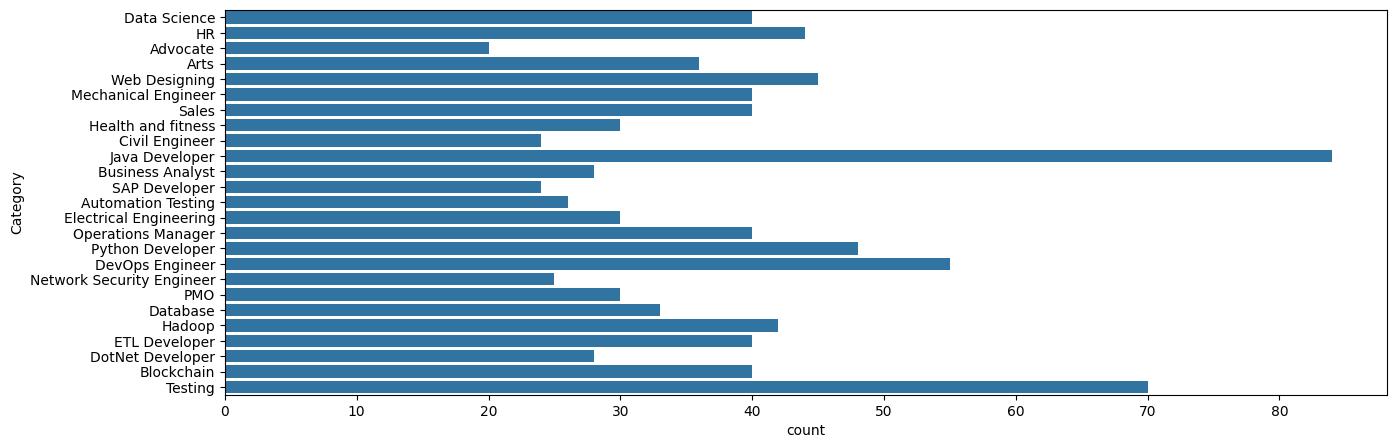

In [5]:
plt.figure(figsize=(15,5))
sns.countplot(df['Category'])
plt.xticks(rotation=0)
plt.show()
           

([<matplotlib.patches.Wedge at 0x1c5e3962600>,
 [Text(1.058871228953308, 0.29797939609125923, 'Data Science'),
  Text(0.7841417468169058, 0.7714413269322118, 'HR'),
  Text(0.4134731563409379, 1.0193330903024107, 'Advocate'),
  Text(0.053862331076050214, 1.098680503736666, 'Arts'),
  Text(-0.2771758554020645, 1.0645062447830609, 'Web Designing'),
  Text(-0.5706079161115722, 0.9404289479119671, 'Mechanical Engineer'),
  Text(-0.8089120262381768, 0.7454269473310228, 'Sales'),
  Text(-0.9773196261993998, 0.5048230860860717, 'Health and fitness'),
  Text(-1.0745482070561094, 0.23525762625789806, 'Civil Engineer'),
  Text(-1.0988505454600117, -0.05027403646252011, 'Java Developer'),
  Text(-1.0485773173407904, -0.3323937567981556, 'Business Analyst'),
  Text(-0.9271404102234844, -0.5919549473825093, 'SAP Developer'),
  Text(-0.7427813690411197, -0.811341998053472, 'Automation Testing'),
  Text(-0.5207132389301881, -0.9689467079271352, 'Electrical Engineering'),
  Text(-0.291057286964679, -1.

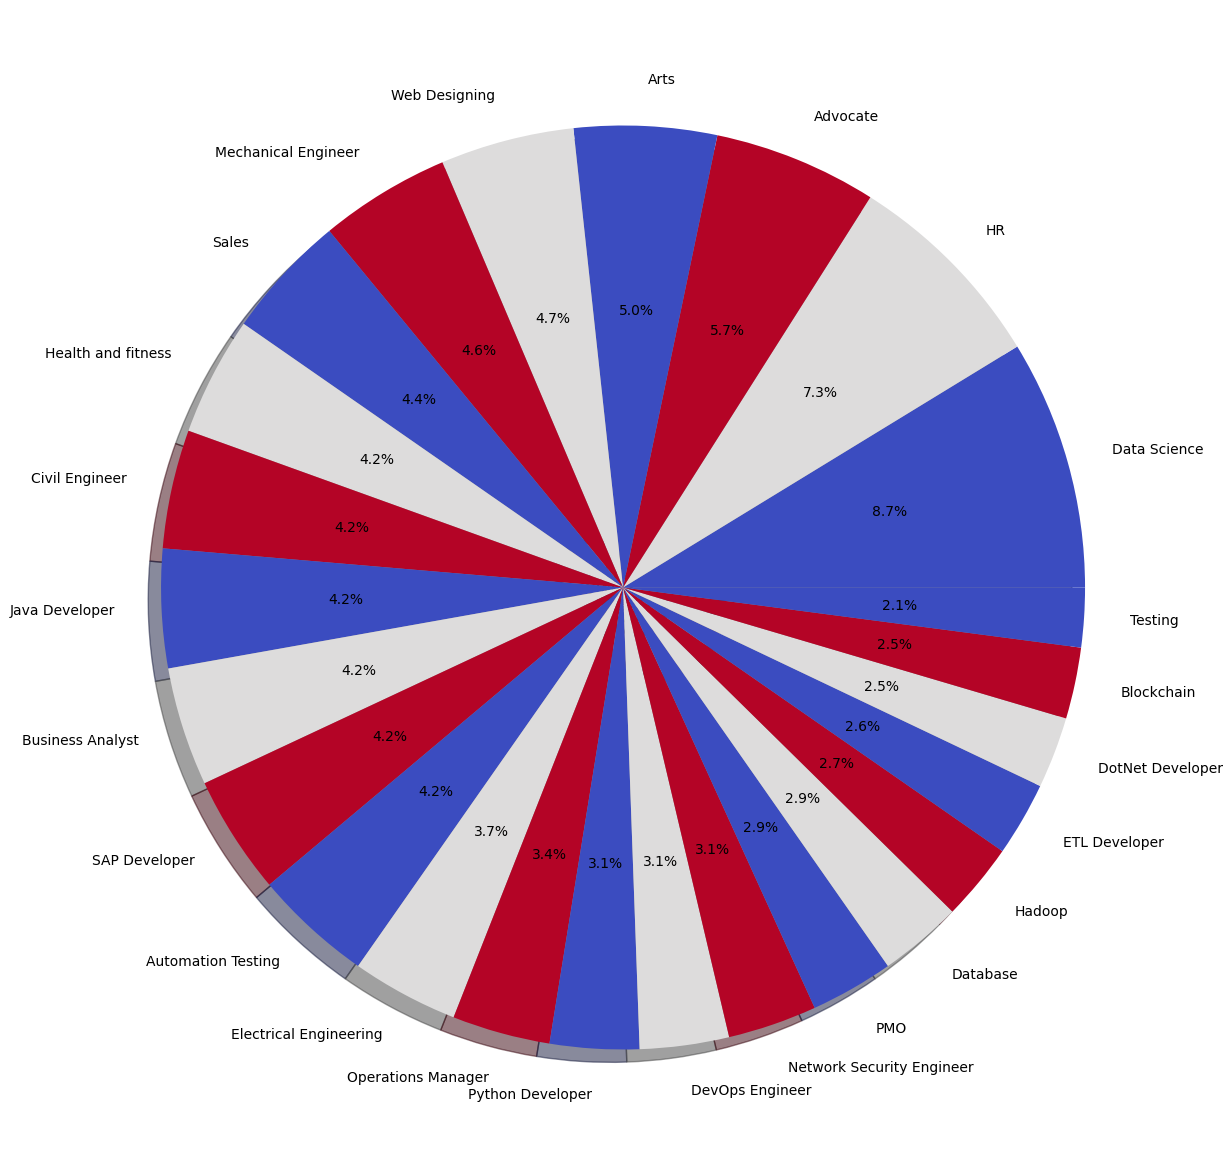

In [19]:
counts=df["Category"].value_counts()
labels = df["Category"].unique()
plt.figure(figsize=(15,15))
plt.pie(counts,labels=labels,autopct="%1.1f%%",shadow= True , colors=plt.cm.coolwarm(np.linspace(0,1,3)))

In [6]:
import re

def cleanResume(txt):
    if not isinstance(txt, str):
        return ''  # If the input is not a string, return an empty string or handle it as needed
    cleanText = re.sub(r'http\S+', ' ', txt)  # URLs
    cleanText = re.sub(r'#\S+', ' ', cleanText)  # Hashtags
    cleanText = re.sub(r'@\S+', '  ', cleanText)  # Mentions
    cleanText = re.sub(r'[%s]' % re.escape(r"""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', cleanText)  # Punctuation
    cleanText = re.sub(r'\s+', ' ', cleanText)  # Extra spaces
    return cleanText

# Applying the cleanResume function to the 'Resume' column
df['Resume'] = df['Resume'].apply(lambda x: cleanResume(x))



In [7]:
df['Resume'][0]

'Skills Programming Languages Python pandas numpy scipy scikit learn matplotlib Sql Java JavaScript JQuery Machine learning Regression SVM NaÃ¯ve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3 js DC js Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV and understanding of Deep learning Education Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations and Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists in accelerating th

In [8]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [9]:
le.fit(df['Category'])
df['Category'] = le.transform(df['Category'])

In [10]:
df.Category.unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

In [11]:
from sklearn.feature_extraction.text import  TfidfVectorizer
tfidf =TfidfVectorizer(stop_words='english')
tfidf.fit(df['Resume'])
requiredText = tfidf.transform(df['Resume'])


In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(requiredText, df['Category'], test_size=0.2, random_state=42)

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score
clf= KNeighborsClassifier()
clf.fit(X_train,y_train)
ypred= clf.predict(X_test)
print(accuracy_score(y_test,ypred))


0.9844559585492227


In [15]:
import pickle
pickle.dump(tfidf,open('tfidf.pkl','wb'))
pickle.dump(clf, open('clf.pkl', 'wb'))

In [16]:
myresume="""I am a tech-driven problem solver with a strong focus on combining AI/ML and data analysis to drive
business results. My expertise lies in building automated systems that streamline lead generation, optimize
marketing processes, and enhance operational efficiency. I excel in planning and coordinating crossfunctional projects, using technology to create scalable solutions for business growth. My background
includes setting up automation workflows, managing marketing operations, and integrating tools to
improve data-driven decision-making. I am passionate about leveraging technology and strategy to deliver
impactful results in fast-paced environments.
Professional Experience
Growth Intern, DevRev
•Designed and deployed lead scoring models to optimize lead qualification
processes, improving sales efficiency and conversion rates.
•Automated workflows using Python, NLP models, and App Script, integrating
with tools to streamline lead generation and data enrichment tasks.
06/2024 – present
Bengaluru, India
•Planned and set up events, coordinating across marketing, design, and
operations teams to align with the overall goal of generating and nurturing highquality leads.
•Managed guest profiles and handled event logistics, ensuring smooth execution
and maximizing engagement at each stage.
•Created landing pages and implemented API integrations within Google Sheets
to automate marketing processes and increase operational efficiency.
Growth Intern, Liquide
•Spearheaded business and data analysis initiatives, optimizing financial
operations and scaling Liquide's services to 6 lakh users.
•Drove product growth through active participation in various funnel levels,
focusing on retention marketing.
03/2023 – 12/2023
Bengaluru
•Executed comprehensive marketing and content strategies, managing SEOs,
social media content, and ad campaigns.
•Fostered cross-functional collaboration across business verticals, contributing
to growth, marketing, and product development.
Media and Operations Associate, BMSCE Alumni Network
•Orchestrated initiatives to bring 50,000+ alumni together, including organizing
events with over 400+ attendees.
•Managed social media platforms, executing strategic posting plans to maximize
engagement and reach.
04/2022 – 05/2023
Bengaluru
Business Development Intern, Luster
•Played a key role in strategic business development, contributing to lead
generation strategies and exploring emerging opportunities.
•Contributed creative ideas and strategies to enhance Luster's visibility within the
Web3 community.
02/2023 – 03/2023
Milestones
InvestZr, Investment guiding platform for GenZ
•Developed an investment guiding platform for GenZ, gaining experience in product building, GTM strategies,
MVP development, and design thinking principles.
•Won recognition as one of the top five teams out of 50 participants in a startup boot camp and incubation
opportunity from BMSCE Incubation Cell.
Skills
Python
Machine Learning
SQL
Stock Market Analysis
Marketing Automation
App Script
Data Analysis
Excel
Search Engine Optimization
Social Media and Content Management
API Integrations
Community Engagement"""

In [17]:
import pickle

# Load the trained classifier
clf = pickle.load(open('clf.pkl', 'rb'))

# Clean the input resume
cleaned_resume = cleanResume(myresume)

# Transform the cleaned resume using the trained TfidfVectorizer
input_features = tfidf.transform([cleaned_resume])

# Make the prediction using the loaded classifier
prediction_id = clf.predict(input_features)[0]

# Map category ID to category name
category_mapping = {
    15: "Java Developer",
    23: "Testing",
    8: "DevOps Engineer",
    20: "Python Developer",
    24: "Web Designing",
    12: "HR",
    13: "Hadoop",
    3: "Blockchain",
    10: "ETL Developer",
    18: "Operations Manager",
    6: "Data Science",
    22: "Sales",
    16: "Mechanical Engineer",
    1: "Arts",
    7: "Database",
    11: "Electrical Engineering",
    14: "Health and fitness",
    19: "PMO",
    4: "Business Analyst",
    9: "DotNet Developer",
    2: "Automation Testing",
    17: "Network Security Engineer",
    21: "SAP Developer",
    5: "Civil Engineer",
    0: "Advocate",
}

category_name = category_mapping.get(prediction_id, "Unknown")

print("Predicted Category:", category_name)
print(prediction_id)

Predicted Category: Operations Manager
18
